In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
#our messy sample dataset
data = {
    "EmpID": [101, 102, "103", 104, 105, 106, None, 108, 109, 110],
    "fullName": [
        " Alice Johnson ", "MICHEAL smith", "sarah lee", "David-Kim", None, "john brown", 
        "Emma Wilson", "TOM  davis", "Jane Miller", "Chris taylor"
    ],
    "Dept": ["IT", "hr", "Mktng", "IT", "Customer Care", "marketing", "Finance", None, "HR", "marketing"],
    "Age": [29, "thirty-five", 26, 31, 42, 27, 33, 30, None, 28],
    "Salary($)": ["$5500.50", "4800", "4200.75", "NaN", "6100", "4,300", "5800", "5000", "4700.0", "4400"],
    "JoinDate": [
        "2021/04/12", "2020/11/01", "2022/01/18", "2019/9/25", "2018/07/05", 
        "2021/10/14", "2019/12/01", "2020/03/22", "2021/05/10", "2022/02/05"
    ],
    "Performance": [87, "73", 90, 65, 82, 75, 88, None, "79%", "91"],
    "Remote?": ["Yes", "No", "Y", "N", "yes", "no", "Y", "Yes", None, "True"]
}


#create the dataframe
df = pd.DataFrame(data)

#convert to csv file
df.to_csv("employee_data.csv", index=False)

df = pd.read_csv("employee_data.csv")
df

,EmpID,fullName,Dept,Age,Salary($),JoinDate,Performance,Remote?
0,101.0,Alice Johnson,IT,29,$5500.50,2021/04/12,87,Yes
1,102.0,MICHEAL smith,hr,thirty-five,4800,2020/11/01,73,No
2,103.0,sarah lee,Mktng,26,4200.75,2022/01/18,90,Y
3,104.0,David-Kim,IT,31,NaN,2019/9/25,65,N
4,105.0,NaN,Customer Care,42,6100,2018/07/05,82,yes
5,106.0,john brown,marketing,27,"4,300",2021/10/14,75,no
6,NaN,Emma Wilson,Finance,33,5800,2019/12/01,88,Y
7,108.0,TOM davis,NaN,30,5000,2020/03/22,NaN,Yes
8,109.0,Jane Miller,HR,NaN,4700.0,2021/05/10,79%,NaN
9,110.0,Chris taylor,marketing,28,4400,2022/02/05,91,True


In [3]:
#get the shapes of the data
df.shape

(10, 8)

In [4]:
#infomation of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EmpID        9 non-null      float64
 1   fullName     9 non-null      object 
 2   Dept         9 non-null      object 
 3   Age          9 non-null      object 
 4   Salary($)    9 non-null      object 
 5   JoinDate     10 non-null     object 
 6   Performance  9 non-null      object 
 7   Remote?      9 non-null      object 
dtypes: float64(1), object(7)
memory usage: 768.0+ bytes


In [5]:
#get the first five rows of the dataset
df.head()

,EmpID,fullName,Dept,Age,Salary($),JoinDate,Performance,Remote?
0,101.0,Alice Johnson,IT,29,$5500.50,2021/04/12,87,Yes
1,102.0,MICHEAL smith,hr,thirty-five,4800,2020/11/01,73,No
2,103.0,sarah lee,Mktng,26,4200.75,2022/01/18,90,Y
3,104.0,David-Kim,IT,31,NaN,2019/9/25,65,N
4,105.0,NaN,Customer Care,42,6100,2018/07/05,82,yes


In [6]:
#get the columns names
df.columns

Index(['EmpID', 'fullName', 'Dept', 'Age', 'Salary($)', 'JoinDate',
       'Performance', 'Remote?'],
      dtype='object')

In [7]:
df.isnull().sum()

EmpID          1
fullName       1
Dept           1
Age            1
Salary($)      1
JoinDate       0
Performance    1
Remote?        1
dtype: int64

In [8]:
#inspect the dataset
print(df["Dept"].unique())
print(df["Remote?"].unique())
print(df["Age"].unique())

['IT' 'hr' 'Mktng' 'Customer Care' 'marketing' 'Finance' nan 'HR']
['Yes' 'No' 'Y' 'N' 'yes' 'no' nan 'True']
['29' 'thirty-five' '26' '31' '42' '27' '33' '30' nan '28']


In [9]:
#inspect salary column
df["Salary($)"].head(10)

0    $5500.50
1        4800
2     4200.75
3         NaN
4        6100
5       4,300
6        5800
7        5000
8      4700.0
9        4400
Name: Salary($), dtype: object

In [10]:
#inspect for JoinDate column
df["JoinDate"].tolist()

['2021/04/12',
 '2020/11/01',
 '2022/01/18',
 '2019/9/25',
 '2018/07/05',
 '2021/10/14',
 '2019/12/01',
 '2020/03/22',
 '2021/05/10',
 '2022/02/05']

In [11]:
#inspect for EmpID, fullName, and performance
df["Performance"].tolist()

['87', '73', '90', '65', '82', '75', '88', nan, '79%', '91']

In [12]:
df["fullName"].tolist()

[' Alice Johnson ',
 'MICHEAL smith',
 'sarah lee',
 'David-Kim',
 nan,
 'john brown',
 'Emma Wilson',
 'TOM  davis',
 'Jane Miller',
 'Chris taylor']

In [13]:
df["EmpID"].tolist()

[101.0, 102.0, 103.0, 104.0, 105.0, 106.0, nan, 108.0, 109.0, 110.0]

In [14]:
#start cleaning the dataset
#rename columns heads
df.rename(columns={
    "EmpID": "emp_id",
    "fullName": "full_name",
    "Dept": "department",
    "Age": "age",
    "Salary($)": "salary",
    "JoinDate": "join_date",
    "Performance": "performance",
    "Remote?": "remote"
}, inplace=True)

df

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,29,$5500.50,2021/04/12,87,Yes
1,102.0,MICHEAL smith,hr,thirty-five,4800,2020/11/01,73,No
2,103.0,sarah lee,Mktng,26,4200.75,2022/01/18,90,Y
3,104.0,David-Kim,IT,31,NaN,2019/9/25,65,N
4,105.0,NaN,Customer Care,42,6100,2018/07/05,82,yes
5,106.0,john brown,marketing,27,"4,300",2021/10/14,75,no
6,NaN,Emma Wilson,Finance,33,5800,2019/12/01,88,Y
7,108.0,TOM davis,NaN,30,5000,2020/03/22,NaN,Yes
8,109.0,Jane Miller,HR,NaN,4700.0,2021/05/10,79%,NaN
9,110.0,Chris taylor,marketing,28,4400,2022/02/05,91,True


In [15]:
#cleaning inconsistent values on fullname
df["full_name"] = df["full_name"].str.strip()
df["full_name"] = df["full_name"].str.title()
df["full_name"] = df["full_name"].str.replace(r"\s+", " ", regex=True)
df["full_name"] = df["full_name"].str.replace("-", " ")

df["full_name"]

0    Alice Johnson
1    Micheal Smith
2        Sarah Lee
3        David Kim
4              NaN
5       John Brown
6      Emma Wilson
7        Tom Davis
8      Jane Miller
9     Chris Taylor
Name: full_name, dtype: object

In [16]:
#clean inconsistent dataa from the department
#rename misspell word and abbreviation
df["department"].replace({
    "It": "IT",
    "hr": "HR",
    "Mktng": "Marketing",
    "finance": "Finance",
    "marketing": "Marketing",
}, inplace=True)
df["department"]

C:\Users\ola-dev\AppData\Local\Temp\ipykernel_14824\690215533.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["department"].replace({


0               IT
1               HR
2        Marketing
3               IT
4    Customer Care
5        Marketing
6          Finance
7              NaN
8               HR
9        Marketing
Name: department, dtype: object

In [17]:
#clean inconsistent age column
def clean_age(value):
    if value == "thirty-five":
        return 35
    elif isinstance(value, (int, float)):
        return value
    else:
        np.nan
df["age"] = df["age"].apply(clean_age)
df["age"]

0     NaN
1    35.0
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
Name: age, dtype: float64

In [18]:
#clean inconsistent values on salary column
df["salary"] = (
    df["salary"]
    .astype(str)
    .replace(r"[$,]", "", regex=True)
    .replace("NaN", np.nan)
    .astype(float)
)
df["salary"]

0    5500.50
1    4800.00
2    4200.75
3        NaN
4    6100.00
5    4300.00
6    5800.00
7    5000.00
8    4700.00
9    4400.00
Name: salary, dtype: float64

In [19]:
#clean the joindate column
df["join_date"] = pd.to_datetime(df["join_date"], errors="coerce")
df["join_date"]

0   2021-04-12
1   2020-11-01
2   2022-01-18
3   2019-09-25
4   2018-07-05
5   2021-10-14
6   2019-12-01
7   2020-03-22
8   2021-05-10
9   2022-02-05
Name: join_date, dtype: datetime64[ns]

In [20]:
#clean the performance column
df["performance"] = (
    df["performance"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .replace("None", np.nan)
    .astype(float)
)
df["performance"]

0    87.0
1    73.0
2    90.0
3    65.0
4    82.0
5    75.0
6    88.0
7     NaN
8    79.0
9    91.0
Name: performance, dtype: float64

In [21]:
#clean remote column
df["remote"].replace({
    "yes": "Yes",
    "no": "No",
    "y": "Yes",
    "n": "No",
    "Y": "Yes",
    "N": "No",
    None: np.nan,
    "True": "Yes"
}, inplace=True)
df["remote"]

C:\Users\ola-dev\AppData\Local\Temp\ipykernel_14824\4114563982.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["remote"].replace({


0    Yes
1     No
2    Yes
3     No
4    Yes
5     No
6    Yes
7    Yes
8    NaN
9    Yes
Name: remote, dtype: object

In [22]:
#clean the empid
df["emp_id"] = pd.to_numeric(df["emp_id"], errors="coerce")
df["emp_id"]

0    101.0
1    102.0
2    103.0
3    104.0
4    105.0
5    106.0
6      NaN
7    108.0
8    109.0
9    110.0
Name: emp_id, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   emp_id       9 non-null      float64       
 1   full_name    9 non-null      object        
 2   department   9 non-null      object        
 3   age          1 non-null      float64       
 4   salary       9 non-null      float64       
 5   join_date    10 non-null     datetime64[ns]
 6   performance  9 non-null      float64       
 7   remote       9 non-null      object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 768.0+ bytes


In [24]:
df.head()

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,NaN,5500.50,2021-04-12,87.0,Yes
1,102.0,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.0,No
2,103.0,Sarah Lee,Marketing,NaN,4200.75,2022-01-18,90.0,Yes
3,104.0,David Kim,IT,NaN,NaN,2019-09-25,65.0,No
4,105.0,NaN,Customer Care,NaN,6100.00,2018-07-05,82.0,Yes


In [25]:
#handling missing values
df.isnull().sum()

emp_id         1
full_name      1
department     1
age            9
salary         1
join_date      0
performance    1
remote         1
dtype: int64

In [26]:
df[df.isnull().any(axis=1)]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,NaN,5500.50,2021-04-12,87.0,Yes
2,103.0,Sarah Lee,Marketing,NaN,4200.75,2022-01-18,90.0,Yes
3,104.0,David Kim,IT,NaN,NaN,2019-09-25,65.0,No
4,105.0,NaN,Customer Care,NaN,6100.00,2018-07-05,82.0,Yes
5,106.0,John Brown,Marketing,NaN,4300.00,2021-10-14,75.0,No
6,NaN,Emma Wilson,Finance,NaN,5800.00,2019-12-01,88.0,Yes
7,108.0,Tom Davis,NaN,NaN,5000.00,2020-03-22,NaN,Yes
8,109.0,Jane Miller,HR,NaN,4700.00,2021-05-10,79.0,NaN
9,110.0,Chris Taylor,Marketing,NaN,4400.00,2022-02-05,91.0,Yes


In [27]:
df.dropna(subset=["emp_id"], inplace=True)

In [28]:
df.isnull().sum()

emp_id         0
full_name      1
department     1
age            8
salary         1
join_date      0
performance    1
remote         1
dtype: int64

In [29]:
df["full_name"] = df["full_name"].fillna("Unknown")
df["full_name"]

0    Alice Johnson
1    Micheal Smith
2        Sarah Lee
3        David Kim
4          Unknown
5       John Brown
7        Tom Davis
8      Jane Miller
9     Chris Taylor
Name: full_name, dtype: object

In [30]:
df["department"] = df["department"].fillna(df["department"].mode()[0])
df["department"]

0               IT
1               HR
2        Marketing
3               IT
4    Customer Care
5        Marketing
7        Marketing
8               HR
9        Marketing
Name: department, dtype: object

In [31]:
df["age"] = df["age"].fillna(df["age"].median())
df["age"]

0    35.0
1    35.0
2    35.0
3    35.0
4    35.0
5    35.0
7    35.0
8    35.0
9    35.0
Name: age, dtype: float64

In [32]:
df["salary"] = df["salary"].fillna(df["salary"].median())
df["salary"]

0    5500.50
1    4800.00
2    4200.75
3    4750.00
4    6100.00
5    4300.00
7    5000.00
8    4700.00
9    4400.00
Name: salary, dtype: float64

In [33]:
df["performance"] = df["performance"].fillna(df["performance"].mean())
df["performance"]

0    87.00
1    73.00
2    90.00
3    65.00
4    82.00
5    75.00
7    80.25
8    79.00
9    91.00
Name: performance, dtype: float64

In [34]:
df["remote"] = df["remote"].fillna(df["remote"].mode()[0])
df["remote"]

0    Yes
1     No
2    Yes
3     No
4    Yes
5     No
7    Yes
8    Yes
9    Yes
Name: remote, dtype: object

In [35]:
df.isnull().sum()

emp_id         0
full_name      0
department     0
age            0
salary         0
join_date      0
performance    0
remote         0
dtype: int64

In [36]:
#working with filtering
df.head()

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.0,Yes
1,102.0,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.0,No
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.0,Yes
3,104.0,David Kim,IT,35.0,4750.00,2019-09-25,65.0,No
4,105.0,Unknown,Customer Care,35.0,6100.00,2018-07-05,82.0,Yes


In [37]:
#select full name column
df["full_name"]

0    Alice Johnson
1    Micheal Smith
2        Sarah Lee
3        David Kim
4          Unknown
5       John Brown
7        Tom Davis
8      Jane Miller
9     Chris Taylor
Name: full_name, dtype: object

In [38]:
#select multiple column
df[["full_name", "salary", "performance"]]

,full_name,salary,performance
0,Alice Johnson,5500.50,87.00
1,Micheal Smith,4800.00,73.00
2,Sarah Lee,4200.75,90.00
3,David Kim,4750.00,65.00
4,Unknown,6100.00,82.00
5,John Brown,4300.00,75.00
7,Tom Davis,5000.00,80.25
8,Jane Miller,4700.00,79.00
9,Chris Taylor,4400.00,91.00


In [39]:
#using iloc to filter data
df.iloc[0:3]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.0,Yes
1,102.0,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.0,No
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.0,Yes


In [40]:
#using loc to filter data
df.loc[df["salary"] >= 5500.50]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,35.0,5500.5,2021-04-12,87.0,Yes
4,105.0,Unknown,Customer Care,35.0,6100.0,2018-07-05,82.0,Yes


In [41]:
df[df["department"] == "IT"]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,35.0,5500.5,2021-04-12,87.0,Yes
3,104.0,David Kim,IT,35.0,4750.0,2019-09-25,65.0,No


In [42]:
#filter employee age greater than 30
df[df["age"] > 30]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.00,Yes
1,102.0,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.00,No
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.00,Yes
3,104.0,David Kim,IT,35.0,4750.00,2019-09-25,65.00,No
4,105.0,Unknown,Customer Care,35.0,6100.00,2018-07-05,82.00,Yes
5,106.0,John Brown,Marketing,35.0,4300.00,2021-10-14,75.00,No
7,108.0,Tom Davis,Marketing,35.0,5000.00,2020-03-22,80.25,Yes
8,109.0,Jane Miller,HR,35.0,4700.00,2021-05-10,79.00,Yes
9,110.0,Chris Taylor,Marketing,35.0,4400.00,2022-02-05,91.00,Yes


In [43]:
#filter employee salary greater than 5000
df[df["salary"] > 5000]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,35.0,5500.5,2021-04-12,87.0,Yes
4,105.0,Unknown,Customer Care,35.0,6100.0,2018-07-05,82.0,Yes


In [44]:
df[df["department"] != "HR"]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.00,Yes
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.00,Yes
3,104.0,David Kim,IT,35.0,4750.00,2019-09-25,65.00,No
4,105.0,Unknown,Customer Care,35.0,6100.00,2018-07-05,82.00,Yes
5,106.0,John Brown,Marketing,35.0,4300.00,2021-10-14,75.00,No
7,108.0,Tom Davis,Marketing,35.0,5000.00,2020-03-22,80.25,Yes
9,110.0,Chris Taylor,Marketing,35.0,4400.00,2022-02-05,91.00,Yes


In [45]:
#employee salary > 5000 and remote worker
df[
    (df["salary"] > 4000) & (df["remote"] == "Yes") 
]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.00,Yes
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.00,Yes
4,105.0,Unknown,Customer Care,35.0,6100.00,2018-07-05,82.00,Yes
7,108.0,Tom Davis,Marketing,35.0,5000.00,2020-03-22,80.25,Yes
8,109.0,Jane Miller,HR,35.0,4700.00,2021-05-10,79.00,Yes
9,110.0,Chris Taylor,Marketing,35.0,4400.00,2022-02-05,91.00,Yes


In [46]:
df[df["department"].isin(["IT", "Finance"])]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,35.0,5500.5,2021-04-12,87.0,Yes
3,104.0,David Kim,IT,35.0,4750.0,2019-09-25,65.0,No


In [47]:
#using string conditions (text filtering)
df[df["full_name"].str.contains("john", case=False)]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,35.0,5500.5,2021-04-12,87.0,Yes
5,106.0,John Brown,Marketing,35.0,4300.0,2021-10-14,75.0,No


In [48]:
df[df["department"].str.startswith("M")]

,emp_id,full_name,department,age,salary,join_date,performance,remote
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.00,Yes
5,106.0,John Brown,Marketing,35.0,4300.00,2021-10-14,75.00,No
7,108.0,Tom Davis,Marketing,35.0,5000.00,2020-03-22,80.25,Yes
9,110.0,Chris Taylor,Marketing,35.0,4400.00,2022-02-05,91.00,Yes


In [49]:
#filtering by datetime
df[df["join_date"] > "2020-12-31"]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.0,Yes
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.0,Yes
5,106.0,John Brown,Marketing,35.0,4300.00,2021-10-14,75.0,No
8,109.0,Jane Miller,HR,35.0,4700.00,2021-05-10,79.0,Yes
9,110.0,Chris Taylor,Marketing,35.0,4400.00,2022-02-05,91.0,Yes


In [50]:
df[
    (df["join_date"] >= "2019-01-01") & (df["join_date"] <= "2021-12-13")
]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,35.0,5500.5,2021-04-12,87.00,Yes
1,102.0,Micheal Smith,HR,35.0,4800.0,2020-11-01,73.00,No
3,104.0,David Kim,IT,35.0,4750.0,2019-09-25,65.00,No
5,106.0,John Brown,Marketing,35.0,4300.0,2021-10-14,75.00,No
7,108.0,Tom Davis,Marketing,35.0,5000.0,2020-03-22,80.25,Yes
8,109.0,Jane Miller,HR,35.0,4700.0,2021-05-10,79.00,Yes


In [51]:
#working with sort
df.sort_values("salary", ascending=False)

,emp_id,full_name,department,age,salary,join_date,performance,remote
4,105.0,Unknown,Customer Care,35.0,6100.00,2018-07-05,82.00,Yes
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.00,Yes
7,108.0,Tom Davis,Marketing,35.0,5000.00,2020-03-22,80.25,Yes
1,102.0,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.00,No
3,104.0,David Kim,IT,35.0,4750.00,2019-09-25,65.00,No
8,109.0,Jane Miller,HR,35.0,4700.00,2021-05-10,79.00,Yes
9,110.0,Chris Taylor,Marketing,35.0,4400.00,2022-02-05,91.00,Yes
5,106.0,John Brown,Marketing,35.0,4300.00,2021-10-14,75.00,No
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.00,Yes


In [52]:
df.sort_values("performance", ascending=False)

,emp_id,full_name,department,age,salary,join_date,performance,remote
9,110.0,Chris Taylor,Marketing,35.0,4400.00,2022-02-05,91.00,Yes
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.00,Yes
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.00,Yes
4,105.0,Unknown,Customer Care,35.0,6100.00,2018-07-05,82.00,Yes
7,108.0,Tom Davis,Marketing,35.0,5000.00,2020-03-22,80.25,Yes
8,109.0,Jane Miller,HR,35.0,4700.00,2021-05-10,79.00,Yes
5,106.0,John Brown,Marketing,35.0,4300.00,2021-10-14,75.00,No
1,102.0,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.00,No
3,104.0,David Kim,IT,35.0,4750.00,2019-09-25,65.00,No


In [53]:
df.sort_values(["department", "salary"], ascending=[True, False])

,emp_id,full_name,department,age,salary,join_date,performance,remote
4,105.0,Unknown,Customer Care,35.0,6100.00,2018-07-05,82.00,Yes
1,102.0,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.00,No
8,109.0,Jane Miller,HR,35.0,4700.00,2021-05-10,79.00,Yes
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.00,Yes
3,104.0,David Kim,IT,35.0,4750.00,2019-09-25,65.00,No
7,108.0,Tom Davis,Marketing,35.0,5000.00,2020-03-22,80.25,Yes
9,110.0,Chris Taylor,Marketing,35.0,4400.00,2022-02-05,91.00,Yes
5,106.0,John Brown,Marketing,35.0,4300.00,2021-10-14,75.00,No
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.00,Yes


In [54]:
#use query method to perform filtering
df.query("`salary` > 5000")

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,35.0,5500.5,2021-04-12,87.0,Yes
4,105.0,Unknown,Customer Care,35.0,6100.0,2018-07-05,82.0,Yes


In [55]:
df.query("`remote` == 'Yes' and `age` >= 30")

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.00,Yes
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.00,Yes
4,105.0,Unknown,Customer Care,35.0,6100.00,2018-07-05,82.00,Yes
7,108.0,Tom Davis,Marketing,35.0,5000.00,2020-03-22,80.25,Yes
8,109.0,Jane Miller,HR,35.0,4700.00,2021-05-10,79.00,Yes
9,110.0,Chris Taylor,Marketing,35.0,4400.00,2022-02-05,91.00,Yes


In [56]:
filtered = (
    df[df["department"].isin(["IT", "Marketing"])]
    .query("`salary` > 4000")
    .sort_values("performance", ascending=False)
)
filtered

,emp_id,full_name,department,age,salary,join_date,performance,remote
9,110.0,Chris Taylor,Marketing,35.0,4400.00,2022-02-05,91.00,Yes
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.00,Yes
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.00,Yes
7,108.0,Tom Davis,Marketing,35.0,5000.00,2020-03-22,80.25,Yes
5,106.0,John Brown,Marketing,35.0,4300.00,2021-10-14,75.00,No
3,104.0,David Kim,IT,35.0,4750.00,2019-09-25,65.00,No


In [57]:
#working with values count
df["department"].value_counts()

department
Marketing        4
IT               2
HR               2
Customer Care    1
Name: count, dtype: int64

In [58]:
df["remote"].value_counts(normalize=True)

remote
Yes    0.666667
No     0.333333
Name: proportion, dtype: float64

In [59]:
#working with pandas merge 
data1 = {
    "department": ["IT", "HR", "Finance", "Marketing", "R&D", "Operations", "Sales", "Logistics", "Procurement", "Customer Service"],
    "manager": [
        "Tom Hanks", "Susan Lee", "Robert Miles", 
        "Mark Chan", "Sarah Connor", "James Nwosu", "Adaeze Obi", 
        "Daniel Smith", "Amina Yusuf", "Grace Ojo"
    ],
    "department_budget": [200000, 150000, 250000, 180000, 300000, 220000, 210000, 195000, 230000, 170000],
    "office_location": [
        "Lagos", "Abuja", "Port Harcourt", "Ibadan", "Enugu", "Kano",
        "Lagos", "Calabar", "Abuja", "Kano"
    ]
}

df1 = pd.DataFrame(data1)

df1.to_csv("department_data.csv", index=False)

department_df = pd.read_csv("department_data.csv")
department_df.head(10)

,department,manager,department_budget,office_location
0,IT,Tom Hanks,200000,Lagos
1,HR,Susan Lee,150000,Abuja
2,Finance,Robert Miles,250000,Port Harcourt
3,Marketing,Mark Chan,180000,Ibadan
4,R&D,Sarah Connor,300000,Enugu
5,Operations,James Nwosu,220000,Kano
6,Sales,Adaeze Obi,210000,Lagos
7,Logistics,Daniel Smith,195000,Calabar
8,Procurement,Amina Yusuf,230000,Abuja
9,Customer Service,Grace Ojo,170000,Kano


In [60]:
df.head()

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.0,Yes
1,102.0,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.0,No
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.0,Yes
3,104.0,David Kim,IT,35.0,4750.00,2019-09-25,65.0,No
4,105.0,Unknown,Customer Care,35.0,6100.00,2018-07-05,82.0,Yes


In [61]:
merge_df = pd.merge(df, department_df, on="department", how="inner")
merge_df

,emp_id,full_name,department,age,salary,join_date,performance,remote,manager,department_budget,office_location
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.00,Yes,Tom Hanks,200000,Lagos
1,102.0,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.00,No,Susan Lee,150000,Abuja
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.00,Yes,Mark Chan,180000,Ibadan
3,104.0,David Kim,IT,35.0,4750.00,2019-09-25,65.00,No,Tom Hanks,200000,Lagos
4,106.0,John Brown,Marketing,35.0,4300.00,2021-10-14,75.00,No,Mark Chan,180000,Ibadan
5,108.0,Tom Davis,Marketing,35.0,5000.00,2020-03-22,80.25,Yes,Mark Chan,180000,Ibadan
6,109.0,Jane Miller,HR,35.0,4700.00,2021-05-10,79.00,Yes,Susan Lee,150000,Abuja
7,110.0,Chris Taylor,Marketing,35.0,4400.00,2022-02-05,91.00,Yes,Mark Chan,180000,Ibadan


In [62]:
left_join = pd.merge(df, department_df, on="department", how="left")
left_join

,emp_id,full_name,department,age,salary,join_date,performance,remote,manager,department_budget,office_location
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.00,Yes,Tom Hanks,200000.0,Lagos
1,102.0,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.00,No,Susan Lee,150000.0,Abuja
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.00,Yes,Mark Chan,180000.0,Ibadan
3,104.0,David Kim,IT,35.0,4750.00,2019-09-25,65.00,No,Tom Hanks,200000.0,Lagos
4,105.0,Unknown,Customer Care,35.0,6100.00,2018-07-05,82.00,Yes,NaN,NaN,NaN
5,106.0,John Brown,Marketing,35.0,4300.00,2021-10-14,75.00,No,Mark Chan,180000.0,Ibadan
6,108.0,Tom Davis,Marketing,35.0,5000.00,2020-03-22,80.25,Yes,Mark Chan,180000.0,Ibadan
7,109.0,Jane Miller,HR,35.0,4700.00,2021-05-10,79.00,Yes,Susan Lee,150000.0,Abuja
8,110.0,Chris Taylor,Marketing,35.0,4400.00,2022-02-05,91.00,Yes,Mark Chan,180000.0,Ibadan


In [63]:
right_join = pd.merge(df, department_df, on="department", how="right")
right_join

,emp_id,full_name,department,age,salary,join_date,performance,remote,manager,department_budget,office_location
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.00,Yes,Tom Hanks,200000,Lagos
1,104.0,David Kim,IT,35.0,4750.00,2019-09-25,65.00,No,Tom Hanks,200000,Lagos
2,102.0,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.00,No,Susan Lee,150000,Abuja
3,109.0,Jane Miller,HR,35.0,4700.00,2021-05-10,79.00,Yes,Susan Lee,150000,Abuja
4,NaN,NaN,Finance,NaN,NaN,NaT,NaN,NaN,Robert Miles,250000,Port Harcourt
5,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.00,Yes,Mark Chan,180000,Ibadan
6,106.0,John Brown,Marketing,35.0,4300.00,2021-10-14,75.00,No,Mark Chan,180000,Ibadan
7,108.0,Tom Davis,Marketing,35.0,5000.00,2020-03-22,80.25,Yes,Mark Chan,180000,Ibadan
8,110.0,Chris Taylor,Marketing,35.0,4400.00,2022-02-05,91.00,Yes,Mark Chan,180000,Ibadan
9,NaN,NaN,R&D,NaN,NaN,NaT,NaN,NaN,Sarah Connor,300000,Enugu


In [64]:
print(merge_df["salary"].mean())

4706.40625


In [65]:
#average salary per department
merge_df.groupby("department")["salary"].mean()

department
HR           4750.0000
IT           5125.2500
Marketing    4475.1875
Name: salary, dtype: float64

In [66]:
#average performance per department and remote
merge_df.groupby(["department", "remote"])["performance"].mean()

department  remote
HR          No        73.000000
            Yes       79.000000
IT          No        65.000000
            Yes       87.000000
Marketing   No        75.000000
            Yes       87.083333
Name: performance, dtype: float64

In [67]:
#working with multiple aggregation using agg()
merge_df.groupby("department")["salary"].agg({"mean", "count", "min", "max"})

,max,min,count,mean
department,,,,
HR,4800.0,4700.00,2,4750.0000
IT,5500.5,4750.00,2,5125.2500
Marketing,5000.0,4200.75,4,4475.1875


In [68]:
#group multiple columns and apply to several
merge_df.groupby("department")[["salary", "performance"]].mean()

,salary,performance
department,,
HR,4750.0000,76.0000
IT,5125.2500,76.0000
Marketing,4475.1875,84.0625


In [69]:
merge_df.groupby("department").agg(
    average_salary=("salary", "mean"),
    highest_salary=("salary", "max"),
    department_count=("salary", "count"),
    lowest_salary=("salary", "min")

)

,average_salary,highest_salary,department_count,lowest_salary
department,,,,
HR,4750.0000,4800.0,2,4700.00
IT,5125.2500,5500.5,2,4750.00
Marketing,4475.1875,5000.0,4,4200.75


In [70]:
merge_df.groupby("department").agg(
    avg_salary=("salary", "mean"),
    total_employee=("emp_id", "count"),
    avg_performance=("performance", "mean")
)

,avg_salary,total_employee,avg_performance
department,,,
HR,4750.0000,2,76.0000
IT,5125.2500,2,76.0000
Marketing,4475.1875,4,84.0625


In [71]:
#reset grouping index
merge_df.groupby("department")["salary"].mean().reset_index()

,department,salary
0,HR,4750.0000
1,IT,5125.2500
2,Marketing,4475.1875


In [72]:
#groupby with sort values
merge_df.groupby("department")["salary"].mean().sort_values(ascending=False).reset_index()

,department,salary
0,IT,5125.2500
1,HR,4750.0000
2,Marketing,4475.1875


In [73]:
#filter groups
merge_df.groupby("department").filter(lambda x: x["salary"].mean() > 5000)

,emp_id,full_name,department,age,salary,join_date,performance,remote,manager,department_budget,office_location
0,101.0,Alice Johnson,IT,35.0,5500.5,2021-04-12,87.0,Yes,Tom Hanks,200000,Lagos
3,104.0,David Kim,IT,35.0,4750.0,2019-09-25,65.0,No,Tom Hanks,200000,Lagos


In [74]:
#adding new employee column for the average salary
merge_df["department_avg_salary"] = merge_df.groupby("department")["salary"].transform("mean")
merge_df

,emp_id,full_name,department,age,salary,join_date,performance,remote,manager,department_budget,office_location,department_avg_salary
0,101.0,Alice Johnson,IT,35.0,5500.50,2021-04-12,87.00,Yes,Tom Hanks,200000,Lagos,5125.2500
1,102.0,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.00,No,Susan Lee,150000,Abuja,4750.0000
2,103.0,Sarah Lee,Marketing,35.0,4200.75,2022-01-18,90.00,Yes,Mark Chan,180000,Ibadan,4475.1875
3,104.0,David Kim,IT,35.0,4750.00,2019-09-25,65.00,No,Tom Hanks,200000,Lagos,5125.2500
4,106.0,John Brown,Marketing,35.0,4300.00,2021-10-14,75.00,No,Mark Chan,180000,Ibadan,4475.1875
5,108.0,Tom Davis,Marketing,35.0,5000.00,2020-03-22,80.25,Yes,Mark Chan,180000,Ibadan,4475.1875
6,109.0,Jane Miller,HR,35.0,4700.00,2021-05-10,79.00,Yes,Susan Lee,150000,Abuja,4750.0000
7,110.0,Chris Taylor,Marketing,35.0,4400.00,2022-02-05,91.00,Yes,Mark Chan,180000,Ibadan,4475.1875


In [75]:
#use groupby apply method to apply custom function
merge_df.groupby("department")["salary"].apply(lambda x: x.std())

department
HR            70.710678
IT           530.683639
Marketing    359.206497
Name: salary, dtype: float64

In [76]:
#calculate the range of salary per departments
merge_df.groupby("department")["salary"].apply(lambda x: x.max() - x.min())

department
HR           100.00
IT           750.50
Marketing    799.25
Name: salary, dtype: float64

In [77]:
#perform aggregation after filter
merge_df[merge_df['remote'] == 'Yes'].groupby('department')['performance'].mean()

department
HR           79.000000
IT           87.000000
Marketing    87.083333
Name: performance, dtype: float64

In [78]:
merge_df.groupby("department").agg({
    "salary":["mean", "max"],
    "performance":["mean", "min"]
})

salary         performance      
                 mean     max        mean   min
department                                     
HR          4750.0000  4800.0     76.0000  73.0
IT          5125.2500  5500.5     76.0000  65.0
Marketing   4475.1875  5000.0     84.0625  75.0

In [79]:
# data2 = {
#     'JoinDate': [
#         'May 12, 2025', 
#         '18/01/2022', 
#         '2025-02-15', 
#         'July 5 2023', 
#         '2024/03/10', 
#         '03/25/2024', 
#         'invalid date'
#     ]
# }
# df2 = pd.DataFrame(data2)
# df2['JoinDate'] = pd.to_datetime(df2['JoinDate'], errors='coerce', dayfirst=True, infer_datetime_format=True)
# print(df2)

In [80]:
from dateutil import parser

data2 = {
    'JoinDate': [
        'May 12, 2025', 
        '18/01/2022', 
        '2025-02-15', 
        'July 5 2023', 
        '2024/03/10', 
        '03/25/2024', 
        'invalid date'
    ]
}

df2 = pd.DataFrame(data2)

def flexible_date_parser(date_str):
    try:
        return parser.parse(date_str, dayfirst=True)
    except Exception:
        return pd.NaT

df2['JoinDate'] = df2['JoinDate'].apply(flexible_date_parser)
print(df2)


    JoinDate
0 2025-05-12
1 2022-01-18
2 2025-02-15
3 2023-07-05
4 2024-10-03
5 2024-03-25
6        NaT


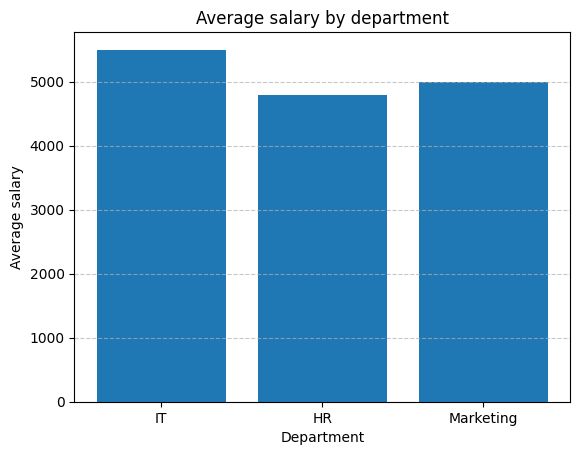

In [81]:
#visualize average salary by department

plt.bar(merge_df["department"], merge_df["salary"])
plt.title("Average salary by department")
plt.xlabel("Department")
plt.ylabel("Average salary")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

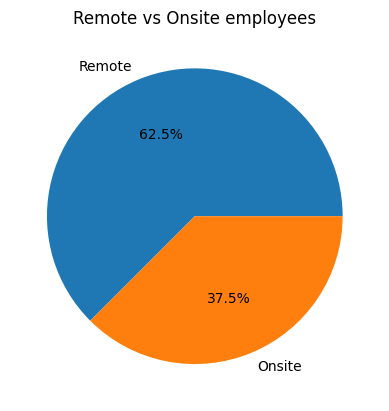

In [82]:
#visualize the proportion of remote vs onsite employee
remote_status = ["Remote", "Onsite"]
plt.pie(merge_df["remote"].value_counts(), labels=remote_status, autopct="%1.1f%%")
plt.title("Remote vs Onsite employees")
plt.show()

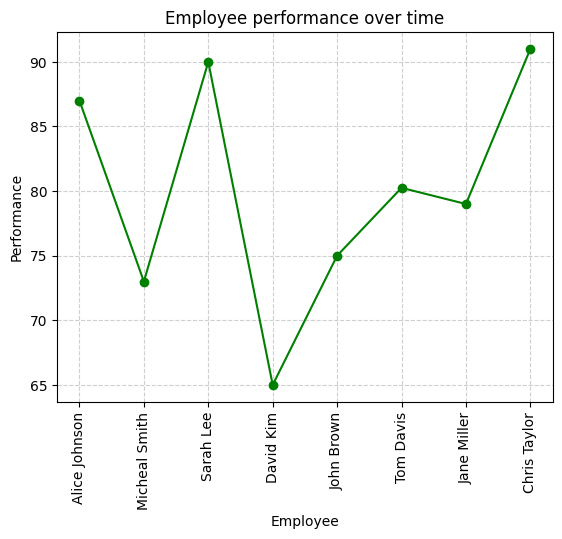

In [83]:
#visualize employee performance over time
plt.plot(merge_df["full_name"], merge_df["performance"], marker="o", color="green")
plt.title("Employee performance over time")
plt.xlabel("Employee")
plt.ylabel("Performance")
plt.xticks(rotation=90)
plt.grid(True, linestyle="--", alpha=0.6)

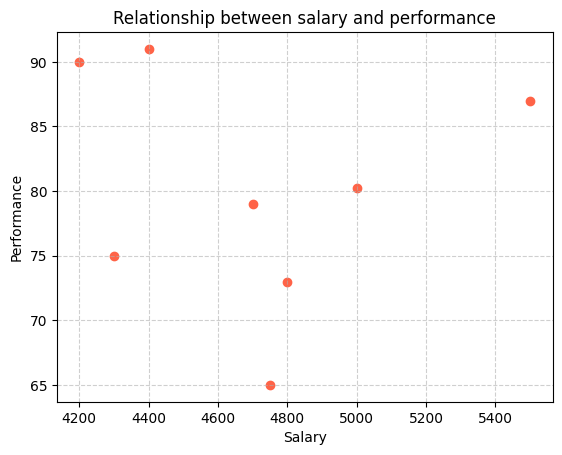

In [84]:
plt.scatter(merge_df["salary"], merge_df["performance"], color="tomato")
plt.title("Relationship between salary and performance")
plt.xlabel("Salary")
plt.ylabel("Performance")
plt.grid(True, linestyle="--", alpha=0.6)

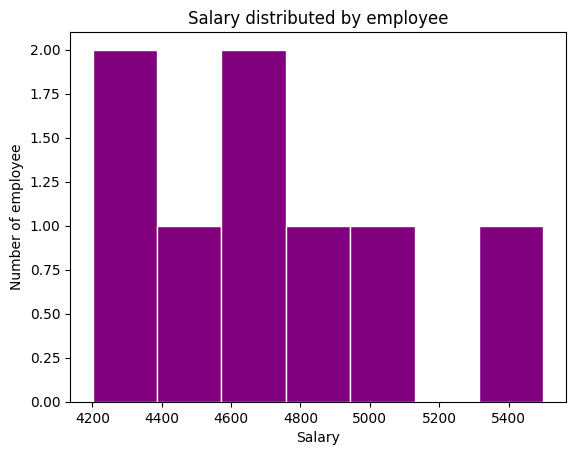

In [85]:
#visualize the distributed salary by employee
plt.hist(merge_df["salary"], bins=7, color="purple", edgecolor="white")
plt.title("Salary distributed by employee")
plt.xlabel("Salary")
plt.ylabel("Number of employee")
plt.show()

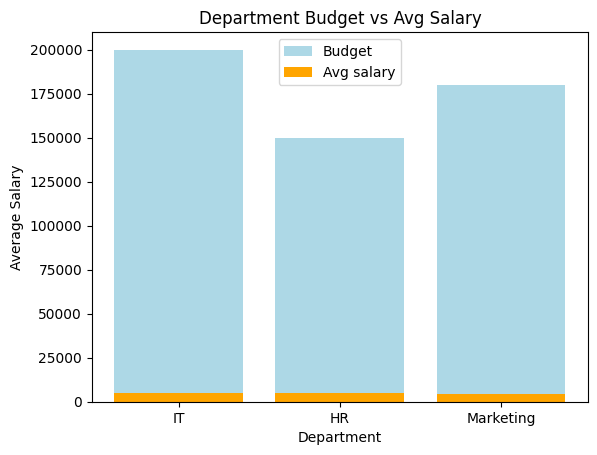

In [86]:
#visualize the stacked bar chart
plt.bar(merge_df["department"], merge_df["department_budget"], color="lightblue", label="Budget")
plt.bar(merge_df["department"], merge_df["department_avg_salary"], color="orange", label="Avg salary")
plt.title("Department Budget vs Avg Salary")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.legend()
plt.show()

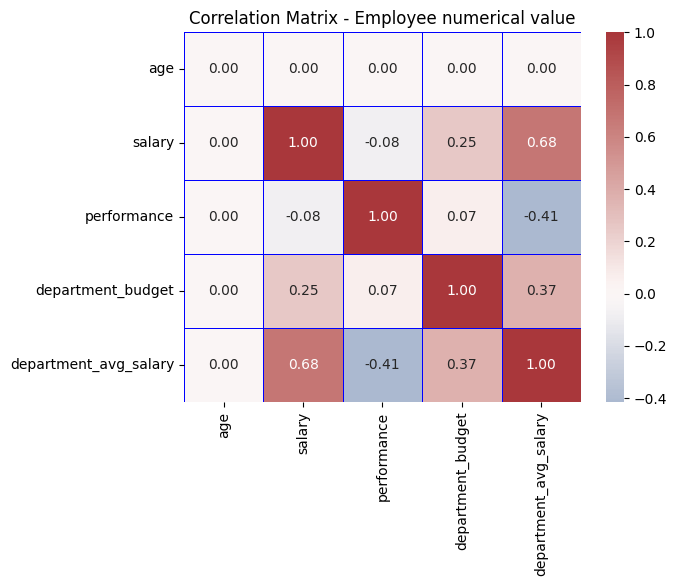

In [119]:
#correlation values for numerical variables
num_cols = ['age', 'salary', 'performance', 'department_budget', 'department_avg_salary']

corr = merge_df[num_cols].corr().fillna(0)
corr

sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0, linewidths="0.5", linecolor="blue")
plt.title("Correlation Matrix - Employee numerical value")
plt.show()

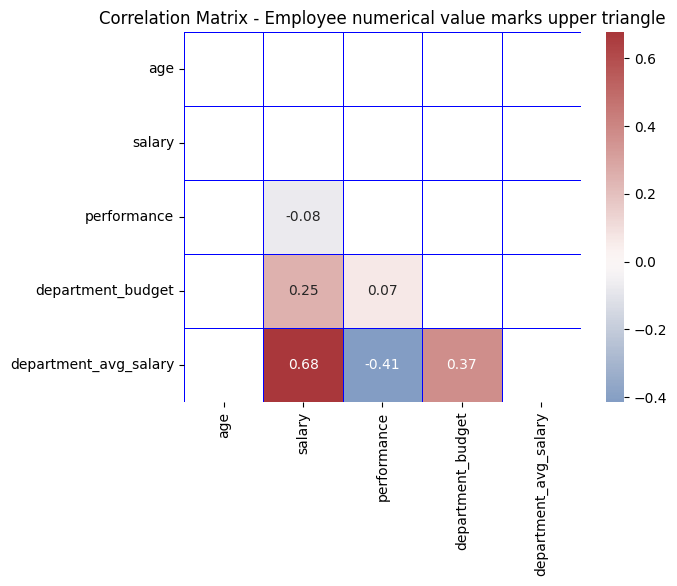

In [88]:
#heatmap marked upper triangle
masks = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=masks, annot=True, fmt=".2f", cmap="vlag", center=0, linewidths="0.5", linecolor="blue")
plt.title("Correlation Matrix - Employee numerical value marks upper triangle")
plt.show()

C:\Users\ola-dev\AppData\Local\Temp\ipykernel_14824\1554879455.py:7: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = pearsonr(df_numeric.iloc[:, i], df_numeric.iloc[:, j])


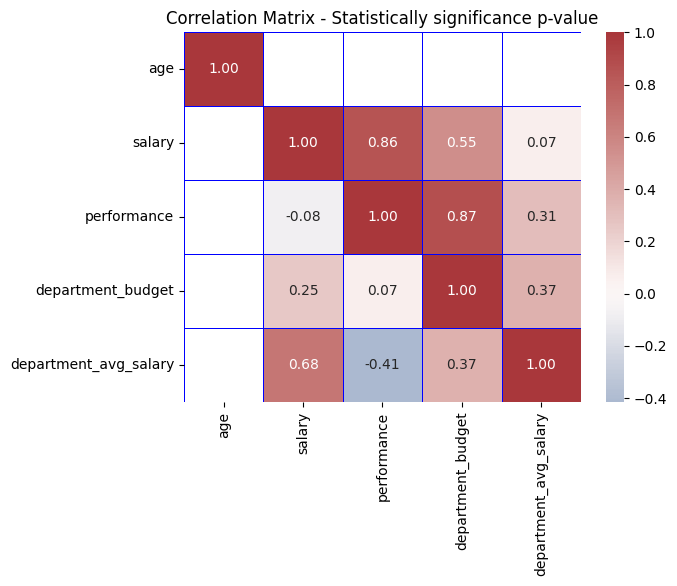

In [90]:
# correlation significance p-values
def corr_pvalue(df_numeric):
    cols = df_numeric.columns
    p_values = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            r, p = pearsonr(df_numeric.iloc[:, i], df_numeric.iloc[:, j])
            p_values.iloc[i, j] = p
            p_values.iloc[j, i] = r

    return p_values
pvalue_corr = corr_pvalue(merge_df[num_cols])

sns.heatmap(pvalue_corr, annot=True, fmt=".2f", cmap="vlag", center=0, linewidths="0.5", linecolor="blue")
plt.title("Correlation Matrix - Statistically significance p-value")
plt.show()

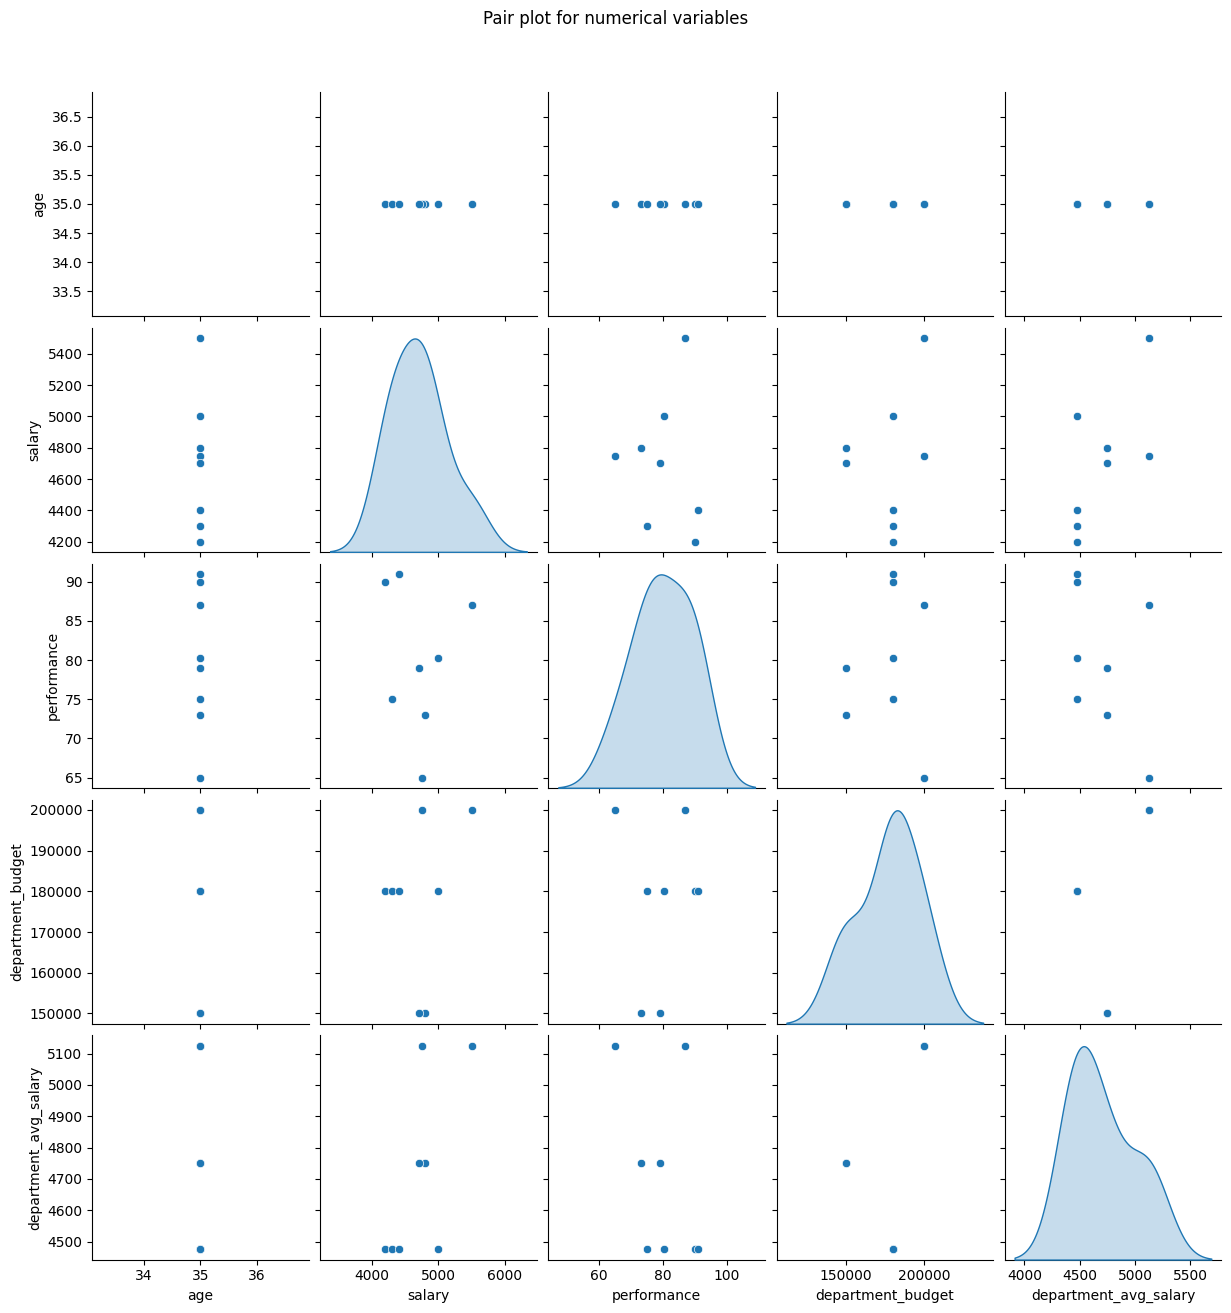

In [109]:
#visualize pair plot relationship for numerical features
sns.pairplot(merge_df[num_cols], diag_kind="kde", corner=False)
plt.suptitle("Pair plot for numerical variables", y=1.05)
plt.show()

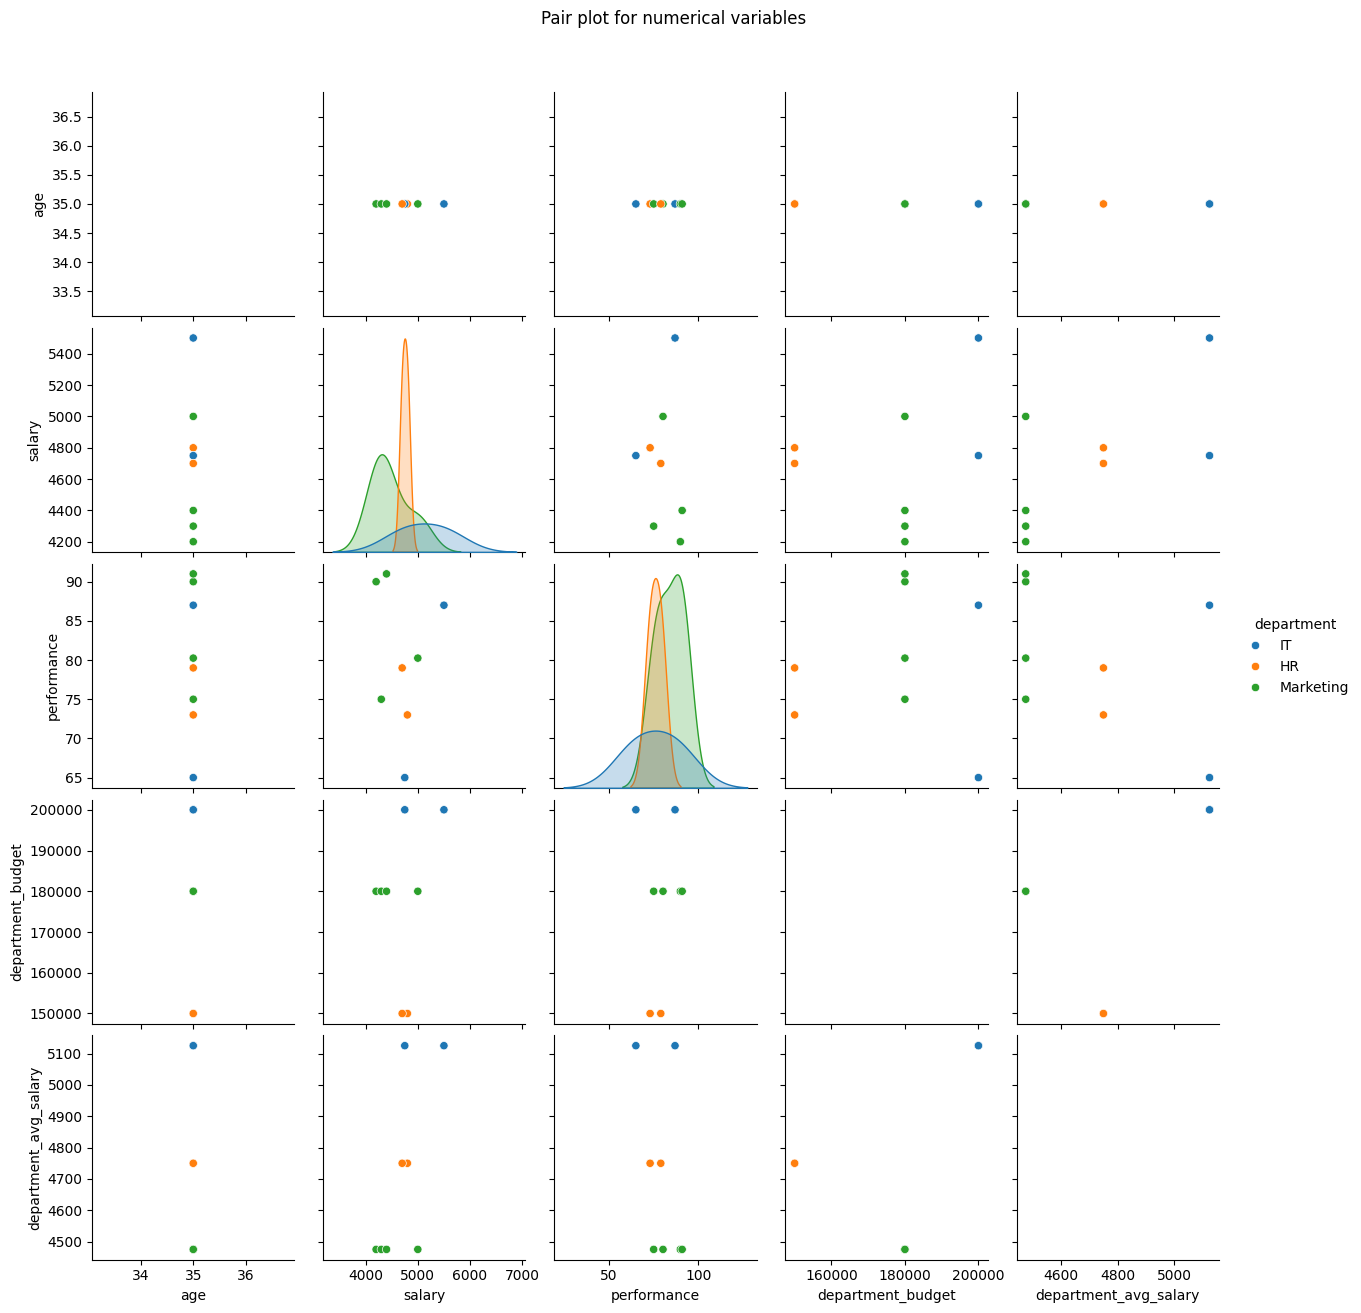

In [117]:
sns.pairplot(merge_df[num_cols + ["department"]], hue="department", diag_kind="kde", corner=False)
plt.suptitle("Pair plot for numerical variables", y=1.05)
plt.show()

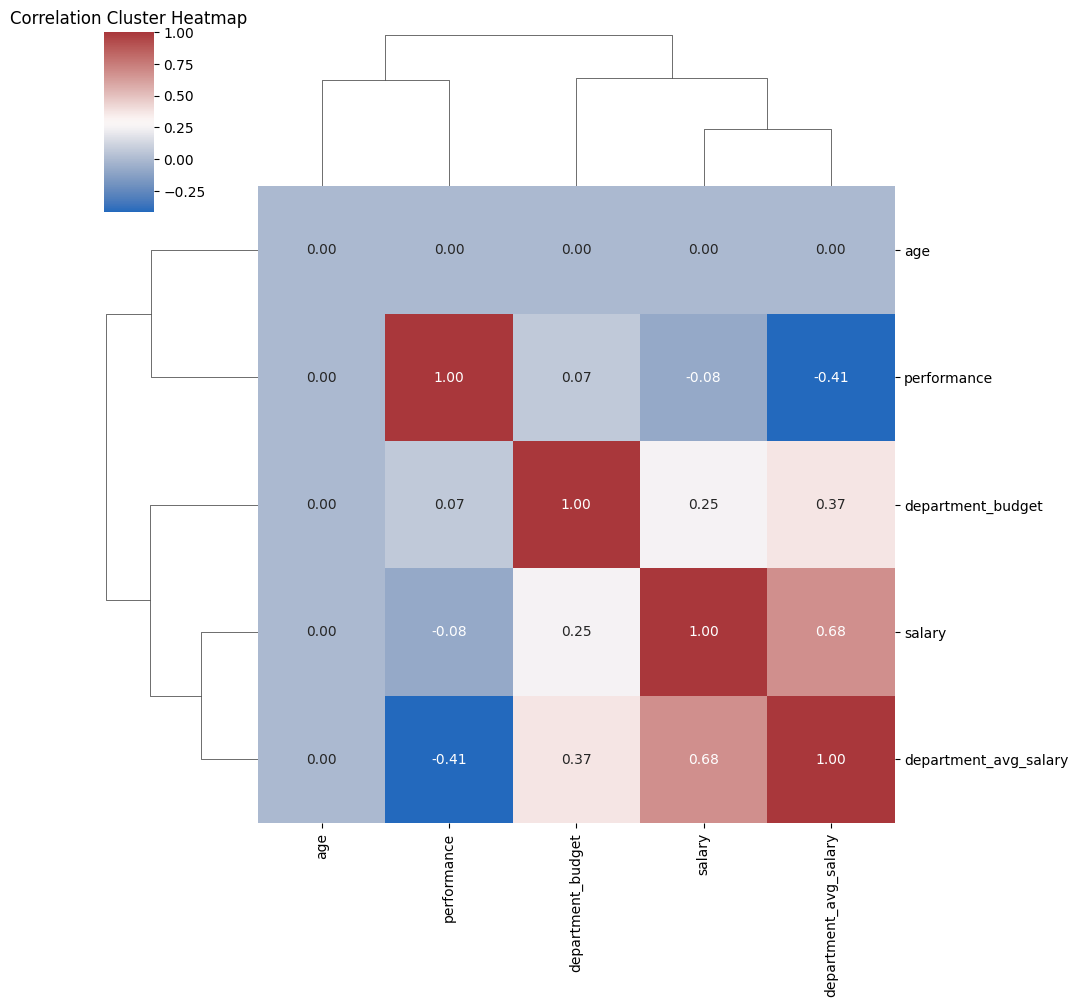

In [120]:
#visualize cluster heatmap
sns.clustermap(corr, annot=True, fmt=".2f", cmap="vlag")
plt.title("Correlation Cluster Heatmap")
plt.show()